In [1]:
import jax.numpy as np
from jax import jit
from discopy import Tensor, Diagram
import math

Tensor.np = np

import discopy

In [2]:
#******************************************
# Generate your corpus
#******************************************
# sentences can be of the `word1 word2 word3 ...`
# if you are generating the diagrams using templates
# then you may want to consider adding POS tags (N, V, Adj) for each word
# labels should be of the form [0,1] or [1,0] for binary classification

# TODO make sentences -> We load from the file. Check out the next block.
# train_sentences = ["Alice loves Bob", "Bob loves Alice", "Charlie hates Bob"]
# dev_sentences = ["Charlie loves Diane"]
# test_sentences = ["Alice not love Bob"]

pair_eq_verbs = set() # [("have", "has")]

# TODO make labels
# train_labels = [[1, 0], [1, 0], [0, 1]]
# dev_labels = [[1, 0]]
# test_labels = [[0, 1]]

# train_labels = np.array(train_labels)
# dev_labels = np.array(dev_labels)
# test_labels = np.array(test_labels)

In [3]:
from tqdm import tqdm
from Week4_NLP.utility import txt_file_to_diagram, divide_three_dataset

#******************************************
# Generate your diagrams
#******************************************
# TODO generate the DisCoCat diagrams for your corpus. There are 2 options:
# 1. Follow a few fixed templates (N V N, N V Adj N, ...)
# 2. Use the online tool to generate diagrams. 
# If you are using the online tool, consider writing a script.

# Suggestion: print out some of your DisCoCat diagrams using
# `grammar.draw` to check that they make sense.

# TODO implement sentence2diagram

dataset, labels = txt_file_to_diagram('./sentence.txt', storage='./dataset.pkl')
train_diagrams, dev_diagrams, test_diagrams, train_labels, dev_labels, test_labels =\
divide_three_dataset(dataset, labels, train_size=0.7, validate_size=0.2)

train_labels = np.array(train_labels)
dev_labels = np.array(dev_labels)
test_labels = np.array(test_labels)
# sentence2diagram = lambda x : get_objects(x, cache_file='./dataset.pkl')

# print("Train_sentences processing")
# train_diagrams = [sentence2diagram(s) for s in tqdm(train_sentences)]

# print("Dev_sentences processing")
# dev_diagrams = [sentence2diagram(s) for s in tqdm(dev_sentences)]

# print("Test_sentences processing")
# test_diagrams = [sentence2diagram(s) for s in tqdm(test_sentences)]

100%|██████████| 64/64 [01:47<00:00,  1.68s/it]


Diagram(
    dom=Ty(),
    cod=Ty('s'),
    boxes=[Word('Alice', Ty('n')),
           Word('loves', Ty(Ob('n', z=1), 's', Ob('n', z=-1))),
           Word('Bob', Ty('n')),
           Cup(Ty('n'), Ty(Ob('n', z=1))),
           Cup(Ty(Ob('n', z=-1)), Ty('n'))],
    offsets=[0, 1, 4, 0, 1])


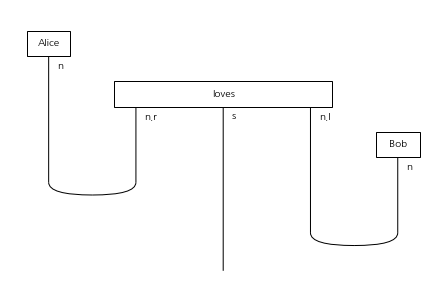

Diagram(
    dom=Ty(),
    cod=Ty('s'),
    boxes=[Word('Charlie', Ty('n')),
           Word('hates', Ty(Ob('n', z=1), 's', Ob('n', z=-1))),
           Word('Bob', Ty('n')),
           Cup(Ty('n'), Ty(Ob('n', z=1))),
           Cup(Ty(Ob('n', z=-1)), Ty('n'))],
    offsets=[0, 1, 4, 0, 1])


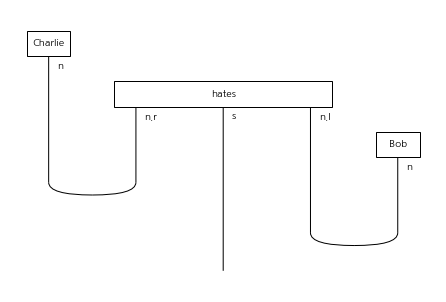

Diagram(
    dom=Ty(),
    cod=Ty('s'),
    boxes=[Word('Diane', Ty('n')),
           Word('not', Ty(Ob('n', z=1), 's', Ob('s', z=-1), 'n')),
           Word('hate', Ty(Ob('n', z=1), 's', Ob('n', z=-1))),
           Word('Alice', Ty('n')),
           Cup(Ty('n'), Ty(Ob('n', z=1))),
           Cup(Ty('n'), Ty(Ob('n', z=1))),
           Cup(Ty(Ob('s', z=-1)), Ty('s')),
           Cup(Ty(Ob('n', z=-1)), Ty('n'))],
    offsets=[0, 1, 5, 8, 0, 2, 1, 1])


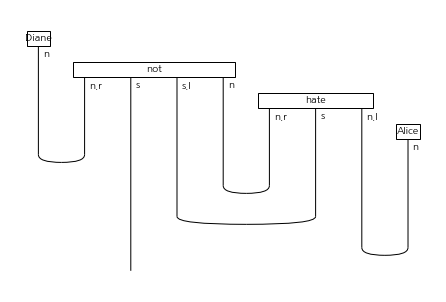

Diagram(
    dom=Ty(),
    cod=Ty('s'),
    boxes=[Word('Charlie', Ty('n')),
           Word('loves', Ty(Ob('n', z=1), 's', Ob('n', z=-1))),
           Word('Charlie', Ty('n')),
           Cup(Ty('n'), Ty(Ob('n', z=1))),
           Cup(Ty(Ob('n', z=-1)), Ty('n'))],
    offsets=[0, 1, 4, 0, 1])


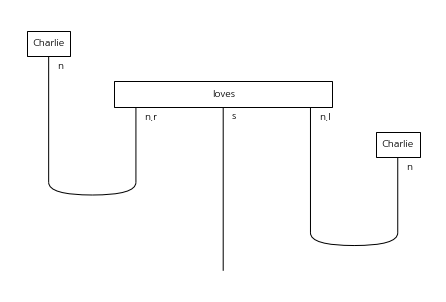

Diagram(
    dom=Ty(),
    cod=Ty('s'),
    boxes=[Word('Bob', Ty('n')),
           Word('not', Ty(Ob('n', z=1), 's', Ob('s', z=-1), 'n')),
           Word('love', Ty(Ob('n', z=1), 's', Ob('n', z=-1))),
           Word('Alice', Ty('n')),
           Cup(Ty('n'), Ty(Ob('n', z=1))),
           Cup(Ty('n'), Ty(Ob('n', z=1))),
           Cup(Ty(Ob('s', z=-1)), Ty('s')),
           Cup(Ty(Ob('n', z=-1)), Ty('n'))],
    offsets=[0, 1, 5, 8, 0, 2, 1, 1])


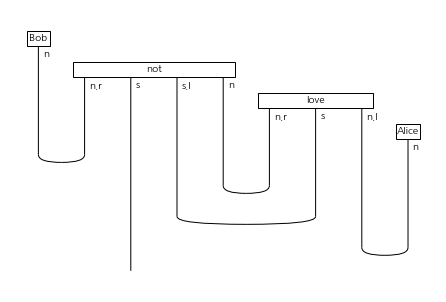

Diagram(
    dom=Ty(),
    cod=Ty('s'),
    boxes=[Word('Charlie', Ty('n')),
           Word('hates', Ty(Ob('n', z=1), 's', Ob('n', z=-1))),
           Word('Diane', Ty('n')),
           Cup(Ty('n'), Ty(Ob('n', z=1))),
           Cup(Ty(Ob('n', z=-1)), Ty('n'))],
    offsets=[0, 1, 4, 0, 1])


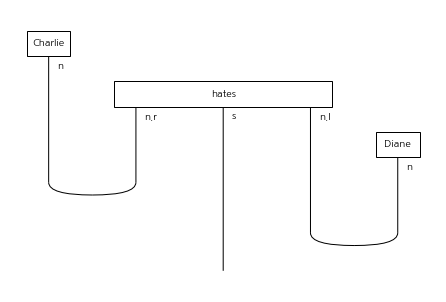

In [4]:
# Print the transformed result
from Week4_NLP.utility import pretty

for d in train_diagrams[:2] + dev_diagrams[:2] + test_diagrams[:2] :
    print(pretty(d))
    d.draw()

In [5]:
# Known words
# word 'not'

from discopy import Word, Ty, Ob, Box, Id, Cap, tensor, Functor
from discopy.quantum import X, QuantumGate
# import numpy

prep_ar_dct = dict()
circuit_ar_dct = dict()

# Known 'not' word.
not_box = Word('not', Ty(Ob('n', z=1), Ob('s'), Ob('s', z=-1), 'n'))
X_box = Box("X", Ty('s'), Ty('s'))
not_diag = Id(Ty(Ob('n', z=1))) @ X_box @ Id(Ty(Ob('s', z=-1)) @ Ty('n'))\
           << Id(Ty(Ob('n', z=1))) @ Cap(Ty('s'), Ty(Ob('s', z=-1))) @ Id(Ty('n'))\
           << Cap(Ty(Ob('n', z=1)), Ty('n'))
X_tensor = X

prep_ar_dct[not_box] = not_diag

# Known 'if' word.
# if_box = Word('if', Ty('s', Ob('s', z=-1), Ob('s', z=-1)))
# tof_arr = numpy.zeros((8, 8), dtype=int)
# tof_arr[:6,:6] = numpy.eye(6)
# tof_arr[6, 7] = 1
# tof_arr[7, 6] = 1
# print(tof_arr)
# TOFFOLI = QuantumGate("TOF", 3, tof_arr)
# if_circuit =

pre_replace = Functor(ob=lambda y: y,
                      ar=lambda y: y if y not in prep_ar_dct else prep_ar_dct[y])

circuit_ar_dct[X_box] = X_tensor

Diagram(
    dom=Ty(),
    cod=Ty('s'),
    boxes=[Word('Alice', Ty('n')),
           Word('loves', Ty(Ob('n', z=1), 's', Ob('n', z=-1))),
           Cup(Ty('n'), Ty(Ob('n', z=1))),
           Word('Bob', Ty('n')),
           Cup(Ty(Ob('n', z=-1)), Ty('n'))],
    offsets=[0, 1, 0, 2, 1])


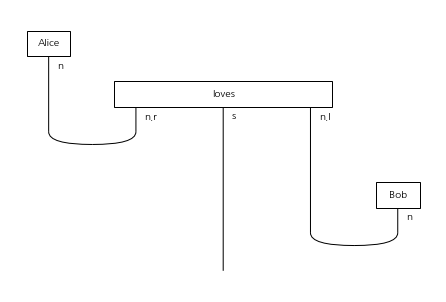

Diagram(
    dom=Ty(),
    cod=Ty('s'),
    boxes=[Word('Charlie', Ty('n')),
           Word('hates', Ty(Ob('n', z=1), 's', Ob('n', z=-1))),
           Cup(Ty('n'), Ty(Ob('n', z=1))),
           Word('Bob', Ty('n')),
           Cup(Ty(Ob('n', z=-1)), Ty('n'))],
    offsets=[0, 1, 0, 2, 1])


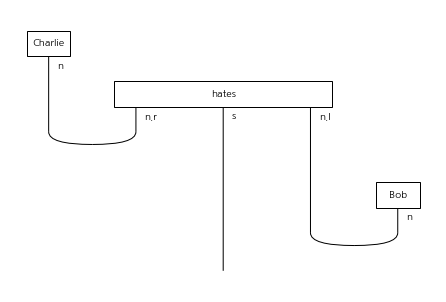

Diagram(
    dom=Ty(),
    cod=Ty('s'),
    boxes=[Word('Diane', Ty('n')),
           Word('hate', Ty(Ob('n', z=1), 's', Ob('n', z=-1))),
           Cup(Ty('n'), Ty(Ob('n', z=1))),
           Box('X', Ty('s'), Ty('s')),
           Word('Alice', Ty('n')),
           Cup(Ty(Ob('n', z=-1)), Ty('n'))],
    offsets=[0, 1, 0, 0, 2, 1])


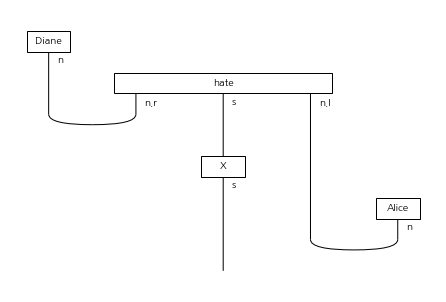

Diagram(
    dom=Ty(),
    cod=Ty('s'),
    boxes=[Word('Charlie', Ty('n')),
           Word('loves', Ty(Ob('n', z=1), 's', Ob('n', z=-1))),
           Cup(Ty('n'), Ty(Ob('n', z=1))),
           Word('Charlie', Ty('n')),
           Cup(Ty(Ob('n', z=-1)), Ty('n'))],
    offsets=[0, 1, 0, 2, 1])


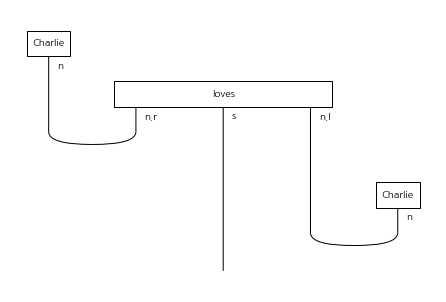

Diagram(
    dom=Ty(),
    cod=Ty('s'),
    boxes=[Word('Bob', Ty('n')),
           Word('love', Ty(Ob('n', z=1), 's', Ob('n', z=-1))),
           Cup(Ty('n'), Ty(Ob('n', z=1))),
           Box('X', Ty('s'), Ty('s')),
           Word('Alice', Ty('n')),
           Cup(Ty(Ob('n', z=-1)), Ty('n'))],
    offsets=[0, 1, 0, 0, 2, 1])


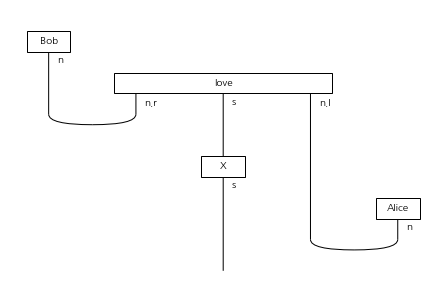

Diagram(
    dom=Ty(),
    cod=Ty('s'),
    boxes=[Word('Charlie', Ty('n')),
           Word('hates', Ty(Ob('n', z=1), 's', Ob('n', z=-1))),
           Cup(Ty('n'), Ty(Ob('n', z=1))),
           Word('Diane', Ty('n')),
           Cup(Ty(Ob('n', z=-1)), Ty('n'))],
    offsets=[0, 1, 0, 2, 1])


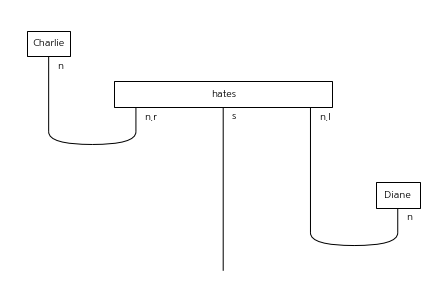

In [6]:
def preprocess(diag):
    diag = pre_replace(diag)
    steps = diag.normalize()
    try:
        while True:
            diag = steps.__next__()
    except StopIteration:
        return diag

pre_train_diagrams = [preprocess(s) for s in train_diagrams]
pre_dev_diagrams = [preprocess(s) for s in dev_diagrams]
pre_test_diagrams = [preprocess(s) for s in test_diagrams]

for d in pre_train_diagrams[:2] + pre_dev_diagrams[:2] + pre_test_diagrams[:2] :
    print(pretty(d))
    d.draw()

words:
['Charlie', 'loves', 'Diane', 'Alice', 'Bob', 'hate', 'hates', 'love']
noun space:
['Charlie', 'Diane', 'Alice', 'Bob']
verb space:
['loves', 'hate', 'hates', 'love']
equivalent verbs:
[('hate', 'hates'), ('love', 'loves')]
grammars:
Diagram(
    dom=Ty('n', Ob('n', z=1), 's', Ob('n', z=-1), 'n'),
    cod=Ty('s'),
    boxes=[Cup(Ty('n'), Ty(Ob('n', z=1))),
           Cup(Ty(Ob('n', z=-1)), Ty('n'))],
    offsets=[0, 1])


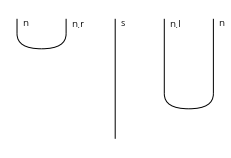

Diagram(
    dom=Ty('n', Ob('n', z=1), 's', Ob('n', z=-1), 'n'),
    cod=Ty('s'),
    boxes=[Cup(Ty('n'), Ty(Ob('n', z=1))),
           Box('X', Ty('s'), Ty('s')),
           Cup(Ty(Ob('n', z=-1)), Ty('n'))],
    offsets=[0, 0, 1])


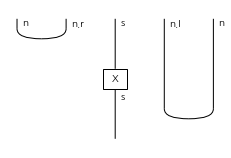

In [7]:
# Generate word space

from discopy import Diagram, Word, Ty

words = set()
grammars = set()
for d in pre_train_diagrams + pre_dev_diagrams + pre_test_diagrams :
    word_pos = list()
    grammar_boxes = list()
    grammar_offsets = list()
    for box, offset in zip(d.boxes, d.offsets):
        if isinstance(box, Word):
            words.add(box)
            word_pos.append(box.cod)
        else:
            grammar_boxes.append(box)
            grammar_offsets.append(offset)
    grammar_dom = word_pos[0]
    for p in word_pos[1:]:
        grammar_dom @= p
    grammars.add(Diagram(dom=grammar_dom,
                         cod=Ty('s'),
                         boxes=grammar_boxes,
                         offsets=grammar_offsets))

from itertools import product

nouns = [w for w in words if w.cod == Ty('n')]
verbs = [w for w in words if w.cod == Ty(Ob('n', z=1), 's', Ob('n', z=-1))]
for v1, v2 in product(verbs, repeat=2):
    if v1.name + 's' == v2.name:
        pair_eq_verbs.add((v1, v2))

print("words:")
print([x.name for x in words])

print("noun space:")
print([x.name for x in nouns])

print("verb space:")
print([x.name for x in verbs])

print("equivalent verbs:")
print([(v1.name, v2.name) for v1, v2 in pair_eq_verbs])

print("grammars:")
for g in grammars:
    print(pretty(g))
    g.draw(figsize=(3,2))

Charlie


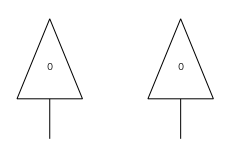

Diane


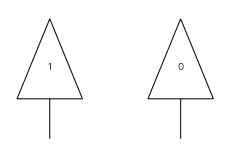

Alice


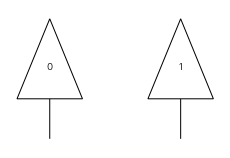

Bob


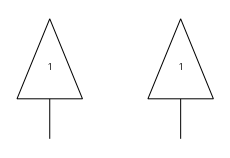

loves


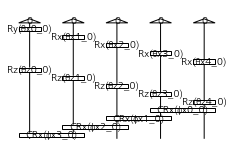

love


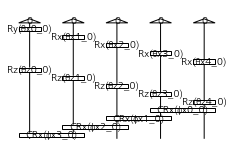

hate


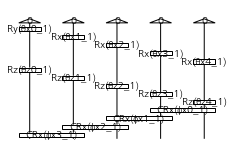

hates


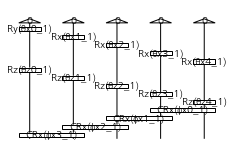

X


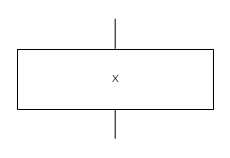

In [8]:
#******************************************
# Generate your circuits
#******************************************
# TODO: Implement your own functorial ansatz conversion!
# The `qnlp-tutorial` has some code on this.
# https://discopy.readthedocs.io/en/main/notebooks/qnlp-tutorial.html
# You may also find discopy's `IQPansatz` function useful.

# Suggestion: Draw some DisCoCat diagrams alongside their circuit diagrams
# and compare them

# TODO implement diagram2circuit
import discopy.quantum as dq
from discopy.quantum import circuit, qubit, Ket, Rx, Ry, Rz, CX, CRx
from copy import deepcopy
from sympy.abc import symbols
from collections.abc import Mapping

num_noun_qubits = math.ceil(np.log2(len(nouns)))
noun_qubits = qubit
for i in range(num_noun_qubits - 1):
    noun_qubits @= qubit

ob_dct={Ty('s'): qubit, Ty('n'): noun_qubits}
ar_dct = dict()

# Noun to Ket
for i, w in enumerate(nouns):
    bin_i = ((i >> k)%2 for k in range(num_noun_qubits))
    ar_dct[w]=Ket(*bin_i)

# Verb to Operation
param_dct = dict()
for i, v in enumerate(verbs):
    if v in ar_dct:
        continue
    # if num_noun_qubits != 2:
    #     raise NotImplementedError
    params = list()

    num_verb_qubits = num_noun_qubits * 2 + 1

    x_ckt = None
    for j in range(num_verb_qubits):
        th_x = symbols(f"θx{j}_{i}")
        assert th_x not in params
        params += [th_x]
        x_ckt = Ry(th_x) if x_ckt is None else x_ckt @ Rx(th_x)

    z_ckt = None
    for j in range(num_verb_qubits):
        th_z = symbols(f"θz{j}_{i}")
        assert th_z not in params
        params += [th_z]
        z_ckt = Rz(th_z) if z_ckt is None else z_ckt @ Rz(th_z)

    ckt = Ket(*(0 for _ in range(num_verb_qubits))) >> x_ckt >> z_ckt
    for j in range(num_verb_qubits - 1):
        ph_x = symbols(f"φx{j}_{i}")
        assert ph_x not in params
        ckt >>= dq.Id(num_verb_qubits - 2 - j) @ CRx(ph_x) @ dq.Id(j)

    ar_dct[v] = ckt
    param_dct[v] = params


    for v1, v2 in pair_eq_verbs:
        if v == v1 :
            ar_dct[v2] = ckt
            param_dct[v2] = params
        elif v == v2 :
            ar_dct[v1] = ckt
            param_dct[v1] = params

# Preprocessing map
ar_dct.update(circuit_ar_dct)

diagram2circuit = circuit.Functor(
    ob=ob_dct,
    ar=ar_dct
)
for k in ar_dct:
    print(k)
    ar_dct[k].draw(figsize=(3,2))

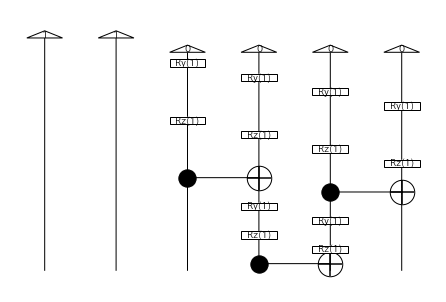

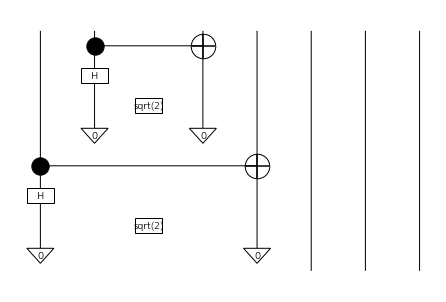

In [9]:
from discopy.quantum import H, sqrt, Bra

tmp_ckt =Ket(1, 1) >> dq.Id(2) @ Ket(0, 0, 0, 0) >> dq.Id(2) @ Ry(1) @ dq.Id(3) >> dq.Id(3) @ Ry(1) @ dq.Id(2) >> dq.Id(4) @ Ry(1) @ dq.Id(1) >> dq.Id(5) @ Ry(1) >> dq.Id(2) @ Rz(1) @ dq.Id(3) >> dq.Id(3) @ Rz(1) @ dq.Id(2) >> dq.Id(4) @ Rz(1) @ dq.Id(1) >> dq.Id(5) @ Rz(1) >> dq.Id(2) @ CX @ dq.Id(2) >> dq.Id(4) @ CX >> dq.Id(3) @ Ry(1) @ dq.Id(2) >> dq.Id(4) @ Ry(1) @ dq.Id(1) >> dq.Id(3) @ Rz(1) @ dq.Id(2) >> dq.Id(4) @ Rz(1) @ dq.Id(1) >> dq.Id(3) @ CX @ dq.Id(1)
tmp_ckt.draw()
tmp_ckt2 = dq.Id(1) @ CX @ dq.Id(4) >> dq.Id(1) @ H @ dq.Id(5) >> dq.Id(2) @ sqrt(2) @ dq.Id(5) >> dq.Id(1) @ Bra(0, 0) @ dq.Id(4) >> CX @ dq.Id(3) >> H @ dq.Id(4) >> dq.Id(1) @ sqrt(2) @ dq.Id(4) >> Bra(0, 0) @ dq.Id(3)
tmp_ckt2.draw()

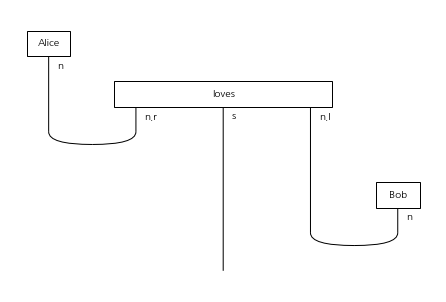

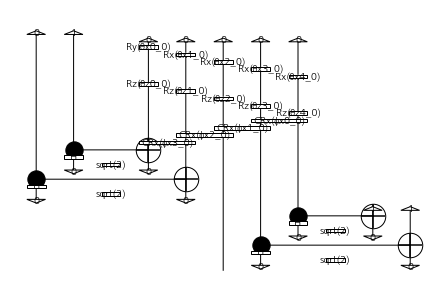

In [10]:
pre_train_diagrams[0].draw()
diagram2circuit(pre_train_diagrams[0]).draw()

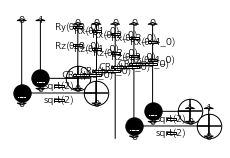

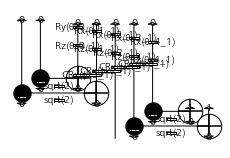

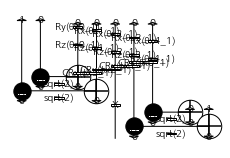

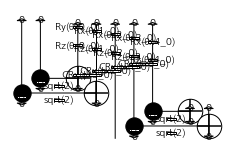

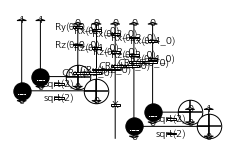

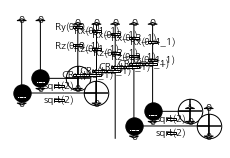

In [11]:
train_circuits = [diagram2circuit(d) for d in pre_train_diagrams]
dev_circuits = [diagram2circuit(d) for d in pre_dev_diagrams]
test_circuits = [diagram2circuit(d) for d in pre_test_diagrams]

for c in train_circuits[:2] + dev_circuits[:2] + test_circuits[:2]:
    c.draw(figsize=(3,2))

In [12]:
# You can define parameterised circuits in DisCoPy
# using sympy variables, then substituting them using `lambdify`
#from discopy import drawing
#from discopy.quantum import Id, Rz, CX, CRz
#from sympy.abc import symbols, phi


#sym = symbols("abc")
#circ = Rz(sym) @ Id(1) >> CX >> CRz(phi)
#drawing.equation(circ, circ.lambdify(sym, phi)(0.1, 0.2), symbol='-->')

In [13]:
# These imports will come in handy when you want to run
# backend simulations.

# from qiskit import IBMQ
# from pytket.extensions.qiskit import AerBackend, IBMQBackend, IBMQEmulatorBackend

In [14]:
#******************************************
# Counting parameters in your model
#******************************************
from sympy import default_sort_key
circuits = train_circuits + dev_circuits + test_circuits

# Make sure you sort your symbols as they are returned as a set.
parameters = sorted({
    s for circ in circuits for s in circ.free_symbols
}, key=default_sort_key)

print(len(parameters))

28


In [15]:
def normalise(predicts):
    # apply smoothing to predicts
    predicts = np.abs(predicts - 1e-9)
    predicts = predicts / predicts.sum()
    return predicts

def BCE_loss(predicts, labels):
    cross_entropies = np.sum(labels * np.log2(predicts))
    cost = -1/len(labels) * np.sum(cross_entropies)

    return cost

In [16]:
def make_pred_fn(circuits):
    def pred_fn(params):
        predictions = np.array([
            normalise(np.abs(c.lambdify(*parameters)(*params).eval().array))
            for c in circuits
        ])
        return predictions

    return pred_fn

In [17]:
train_pred_fn = jit(make_pred_fn(train_circuits))
dev_pred_fn = jit(make_pred_fn(dev_circuits))
test_pred_fn = jit(make_pred_fn(test_circuits))

import numpy as onp
# onp.random.seed(0)

x0 = np.array(onp.random.random(len(parameters)))
print("Performing Just-In-Time compilation, this may take a while...")
train_pred_fn(x0)
dev_pred_fn(x0)

Performing Just-In-Time compilation, this may take a while...


DeviceArray([[0.7979582 , 0.20204177],
             [0.25953513, 0.74046487],
             [0.7164255 , 0.28357458],
             ...,
             [0.95432466, 0.04567536],
             [0.37772945, 0.6222705 ],
             [0.37436503, 0.6256349 ]], dtype=float32)

In [18]:
def make_cost_fn(pred_fn, labels):
    costs = []
    accs = []
    params_list = []
    def cost_fn(params, **kwargs):
        predictions = pred_fn(params)

        cost = BCE_loss(predictions, labels)
        acc = np.sum(np.round(predictions) == labels) / len(labels) / 2
        costs.append(cost)
        accs.append(acc)
        params_list.append(params)

        return cost

    return cost_fn, costs, accs, params_list

In [19]:
# Rerun this cell onwards, so you can reuse the JITed prediction functions

train_cost_fn, train_costs, train_accs, spsa_params = make_cost_fn(train_pred_fn, train_labels)
dev_cost_fn, dev_costs, dev_accs, callback_params = make_cost_fn(dev_pred_fn, dev_labels)
test_cost_fn, test_costs, test_accs, _ = make_cost_fn(test_pred_fn, test_labels)

In [20]:
from noisyopt import minimizeSPSA
minimizeSPSA(train_cost_fn, x0=x0, a=0.13, c=0.1, niter=2000, callback=dev_cost_fn)

     fun: DeviceArray(0.3362217, dtype=float32)
 message: 'terminated after reaching max number of iterations'
    nfev: 4000
     nit: 2000
 success: True
       x: DeviceArray([0.03836557, 0.43403843, 0.505111  , ..., 0.39490077,
             0.26446363, 0.2546042 ], dtype=float32)

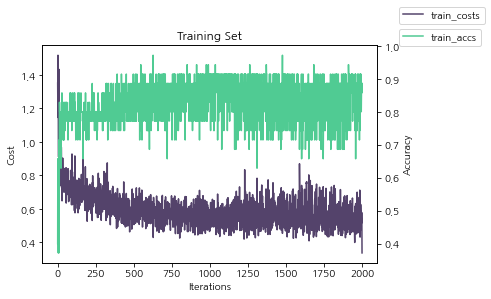

In [21]:
import matplotlib.pylab as plt
fig, ax1 = plt.subplots()
ax1.plot(train_costs[::2], color='#54436B', label="train_costs")
ax1.set_ylabel('Cost')
ax1.set_xlabel('Iterations')
ax1.set_title('Training Set')

ax2 = ax1.twinx()
ax2.plot(train_accs[::2], color='#50CB93', label="train_accs")
ax2.set_ylabel('Accuracy')

ax1.legend(loc='upper left', bbox_to_anchor=(1.05,1.2))
ax2.legend(loc='upper left', bbox_to_anchor=(1.05,1.1))
plt.show()

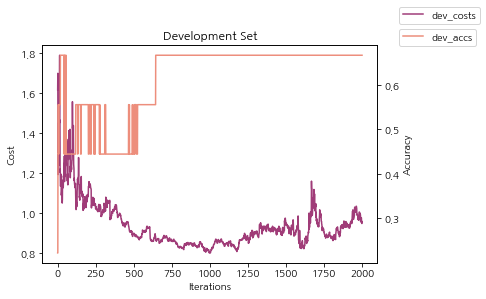

In [22]:
fig, ax1 = plt.subplots()
ax1.plot(dev_costs, color='#A03C78', label="dev_costs")
ax1.set_ylabel('Cost')
ax1.set_xlabel('Iterations')
ax1.set_title('Development Set')

ax2 = ax1.twinx()
ax2.plot(dev_accs, color='#ED8E7C', label="dev_accs")
ax2.set_ylabel('Accuracy')

ax1.legend(loc='upper left', bbox_to_anchor=(1.05,1.2))
ax2.legend(loc='upper left', bbox_to_anchor=(1.05,1.1))
plt.show()

In [25]:
# when you are happy with the development set results
# run your model on the testing set

for p in callback_params:
    test_cost_fn(p)

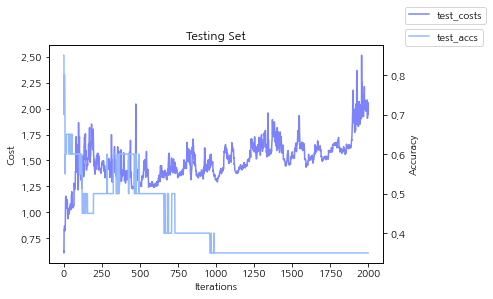

In [26]:
fig, ax1 = plt.subplots()
ax1.plot(test_costs, color='#7C83FD', label="test_costs")
ax1.set_ylabel('Cost')
ax1.set_xlabel('Iterations')
ax1.set_title('Testing Set')

ax2 = ax1.twinx()
ax2.plot(test_accs, color='#96BAFF', label="test_accs")
ax2.set_ylabel('Accuracy')

ax1.legend(loc='upper left', bbox_to_anchor=(1.05,1.2))
ax2.legend(loc='upper left', bbox_to_anchor=(1.05,1.1))

plt.show()